In [99]:
pip install gala astroquery

Note: you may need to restart the kernel to use updated packages.


In [100]:
pip install gala

Note: you may need to restart the kernel to use updated packages.


In [101]:
# astropy imports
import astropy.coordinates as coord
from astropy.io import fits
from astropy.table import QTable
import astropy.units as u
import astropy.constants as const
from astroquery.gaia import Gaia

# Third-party imports
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import animation
from IPython.display import HTML
import numpy as np
%matplotlib inline

# gala imports
import gala.coordinates as gc
import gala.dynamics as gd
import gala.potential as gp
import gala.integrate as gi
from gala.dynamics import mockstream as ms
from gala.units import galactic

In [102]:
#import the Gaia data
gaia_data = QTable.read('/Users/elenaruizlaguna/Desktop/Universidad/Máster/1º/1er cuatrimeste/Física Galáctica/Práctica integración de órbitas/gaia_data.fits')

In [103]:
dist = coord.Distance(parallax=u.Quantity(gaia_data['parallax']))
dist.min(), dist.max()

(<MaskedDistance 28.1613621 pc>, <MaskedDistance 7077.59832039 pc>)

In [104]:
c = coord.SkyCoord(ra=gaia_data['ra'],
                   dec=gaia_data['dec'],
                   distance=dist,
                   pm_ra_cosdec=gaia_data['pmra'],
                   pm_dec=gaia_data['pmdec'],
                   radial_velocity=gaia_data['radial_velocity'])

In [105]:
galcen = c.transform_to(coord.Galactocentric(z_sun=0*u.pc,
                                             galcen_distance=8.1*u.kpc))

In [106]:
#Define the potential
mw_potential = gp.MilkyWayPotential()

"Modifying the potential so we also consider the accretion of the Andromeda to the Milky Way"

"We define the parameters"
andromeda_initial_distance = 800*u.kpc
andromeda_merger_time = 2500*u.Myr
G = const.G

"Andromeda Composite Potential"
bulge = gp.HernquistPotential(m=3.2e10*u.Msun, c=0.61*u.kpc, units=galactic)
disk = gp.MN3ExponentialDiskPotential(m=3.66e10*u.Msun, h_R=5.4*u.kpc,
                                      h_z=0.6*u.kpc, units=galactic)
halo = gp.NFWPotential(m=7.1e11*u.Msun, r_s=7.63*u.kpc, units=galactic)
m31 = gp.CompositePotential(halo=halo, bulge=bulge, disk=disk)

"Total Potential"
total_pot = gp.CCompositePotential()

# Milky Way components
total_pot['mw_bulge'] = mw_potential['bulge']
total_pot['mw_disk'] = mw_potential['disk']
total_pot['mw_halo'] = mw_potential['halo']

# Andromeda components
total_pot['m31_bulge'] = bulge
total_pot['m31_disk'] = disk
total_pot['m31_halo'] = halo

"Integrator method"
w0_com = gd.PhaseSpacePosition(galcen.cartesian)


In [107]:
H = gp.Hamiltonian(total_pot)

In [108]:
orbits_com = H.integrate_orbit(w0_com, dt=5*u.Myr,
                               t1=0*u.Myr, t2=3000*u.Myr)

In [109]:
print(orbits_com.shape)

(600, 298)


In [110]:
prog_w0 = gd.PhaseSpacePosition(pos=[-8, 0, 0.] * u.kpc,
                                vel=[0, 150, -89] * u.km/u.s)

In [160]:
df = ms.ChenStreamDF()
prog_mass = 3E8 * u.Msun

In [161]:
gen = ms.MockStreamGenerator(df, H)

In [162]:
stream, prog = gen.run(prog_w0, prog_mass,
                       dt=5 * u.Myr, n_steps=3000)

In [163]:
stream2, prog = gen.run(prog_w0, prog_mass,
                       dt=3.3 * u.Myr, n_steps=2000)

In [164]:
stream3, prog = gen.run(prog_w0, prog_mass,
                       dt=2.5 * u.Myr, n_steps=1500)

In [165]:
stream4, prog = gen.run(prog_w0, prog_mass,
                       dt=1.3 * u.Myr, n_steps=800)

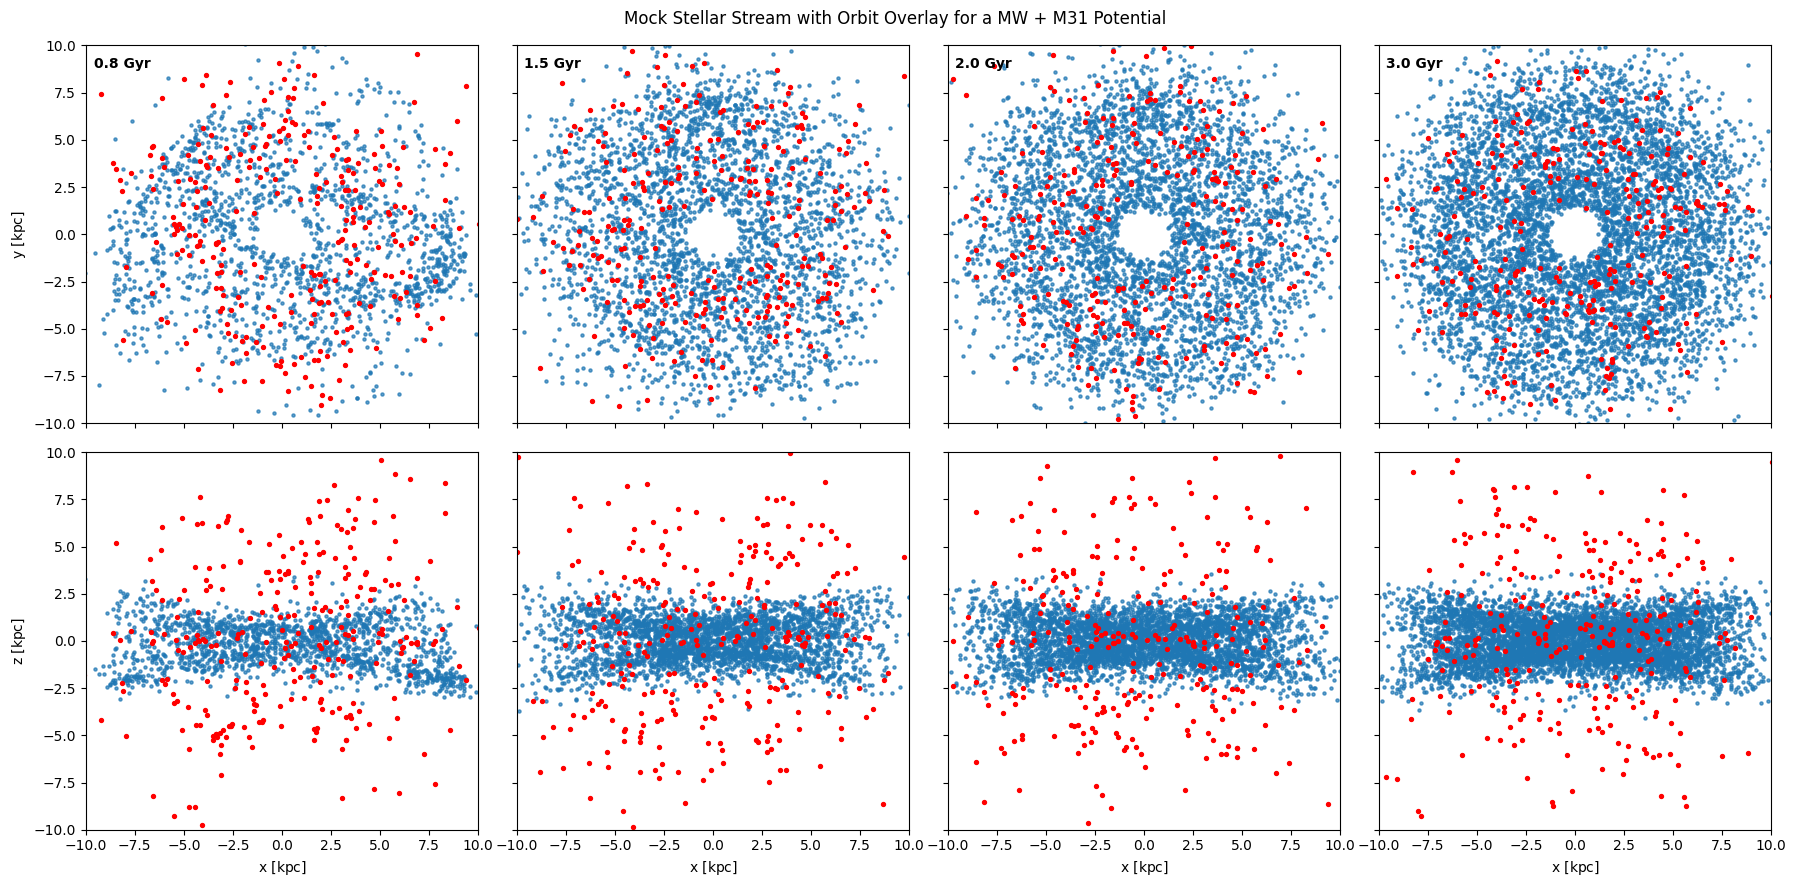

In [167]:
fig, axs = plt.subplots(2, 4, figsize=(18, 9), sharex='col', sharey=True)

x_limits = (-10, 10)
y_limits = (-10, 10)

times = ["0.8 Gyr", "1.5 Gyr", "2.0 Gyr", "3.0 Gyr"]

axs[0,0].scatter(stream4.pos.x, stream4.pos.y, s=5, alpha=0.7, label='Stellar Stream')
axs[0,0].scatter(orbits_com[159, :].pos.x, orbits_com[159, :].pos.y, s=8, color='red', alpha=1, label='Orbit Path')
axs[0,0].set_xlim(x_limits)
axs[0,0].set_ylim(y_limits)
axs[0,0].set_ylabel(r'y $\rm [kpc]$')
axs[0,0].text(0.02, 0.97, times[0], transform=axs[0,0].transAxes, fontsize=10, va='top', ha='left', fontweight='bold')


axs[0,1].scatter(stream3.pos.x, stream3.pos.y, s=5, alpha=0.7, label='Stellar Stream')
axs[0,1].scatter(orbits_com[299, :].pos.x, orbits_com[299, :].pos.y, s=8, color='red', alpha=1, label='Orbit Path')
axs[0,1].set_xlim(x_limits)
axs[0,1].set_ylim(y_limits)
axs[0,1].text(0.02, 0.97, times[1], transform=axs[0,1].transAxes, fontsize=10, va='top', ha='left', fontweight='bold')


axs[0,2].scatter(stream2.pos.x, stream2.pos.y, s=5, alpha=0.7, label='Stellar Stream')
axs[0,2].scatter(orbits_com[399, :].pos.x, orbits_com[399, :].pos.y, s=8, color='red', alpha=1, label='Orbit Path')
axs[0,2].set_xlim(x_limits)
axs[0,2].set_ylim(y_limits)
axs[0,2].text(0.02, 0.97, times[2], transform=axs[0,2].transAxes, fontsize=10, va='top', ha='left', fontweight='bold')



axs[0,3].scatter(stream.pos.x, stream.pos.y, s=5, alpha=0.7, label='Stellar Stream')
axs[0,3].scatter(orbits_com[599, :].pos.x, orbits_com[599, :].pos.y, s=8, color='red', alpha=1, label='Orbit Path')
axs[0,3].set_xlim(x_limits)
axs[0,3].set_ylim(y_limits)
axs[0,3].text(0.02, 0.97, times[3], transform=axs[0,3].transAxes, fontsize=10, va='top', ha='left', fontweight='bold')



axs[1,0].scatter(stream4.pos.x, stream4.pos.z, s=5, alpha=0.7, label='Stellar Stream')
axs[1,0].scatter(orbits_com[159, :].pos.x, orbits_com[159, :].pos.z, s=8, color='red', alpha=1, label='Orbit Path')
axs[1,0].set_xlim(x_limits)
axs[1,0].set_ylim(y_limits)
axs[1,0].set_xlabel(r'x $\rm [kpc]$')
axs[1,0].set_ylabel(r'z $\rm [kpc]$')



axs[1,1].scatter(stream3.pos.x, stream3.pos.z, s=5, alpha=0.7, label='Stellar Stream')
axs[1,1].scatter(orbits_com[299, :].pos.x, orbits_com[299, :].pos.z, s=8, color='red', alpha=1, label='Orbit Path')
axs[1,1].set_xlim(x_limits)
axs[1,1].set_ylim(y_limits)
axs[1,1].set_xlabel(r'x $\rm [kpc]$')



axs[1,2].scatter(stream2.pos.x, stream2.pos.z, s=5, alpha=0.7, label='Stellar Stream')
axs[1,2].scatter(orbits_com[399, :].pos.x, orbits_com[399, :].pos.z, s=8, color='red', alpha=1, label='Orbit Path')
axs[1,2].set_xlim(x_limits)
axs[1,2].set_ylim(y_limits)
axs[1,2].set_xlabel(r'x $\rm [kpc]$')



axs[1,3].scatter(stream.pos.x, stream.pos.z, s=5, alpha=0.7, label='Stellar Stream')
axs[1,3].scatter(orbits_com[599, :].pos.x, orbits_com[599, :].pos.z, s=8, color='red', alpha=1, label='Orbit Path')
axs[1,3].set_xlim(x_limits)
axs[1,3].set_ylim(y_limits)
axs[1,3].set_xlabel(r'x $\rm [kpc]$')

plt.suptitle('Mock Stellar Stream with Orbit Overlay for a MW + M31 Potential')
plt.tight_layout()
plt.savefig('mock_stellar_stream_mw&m31.pdf')
plt.show()